# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
from tkinter import Tk
from tkinter.filedialog import askopenfilename
import matplotlib.pyplot as plt
import seaborn as sns

## Reading CSV

In [6]:
Tk().withdraw()  # to hide the main window
filename = askopenfilename()  # show an "Open" dialog box and return the path to the selected file
data = pd.read_csv(filename)
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Data Size

In [12]:
print(f'Shape of the data set: {data.shape}')
data.info()

Shape of the data set: (2938, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null  

Seems like there is about 22 columns and almost 3000 entries. However, this data has some null values thus we have to try to fix this. First we map the heat map of all null values

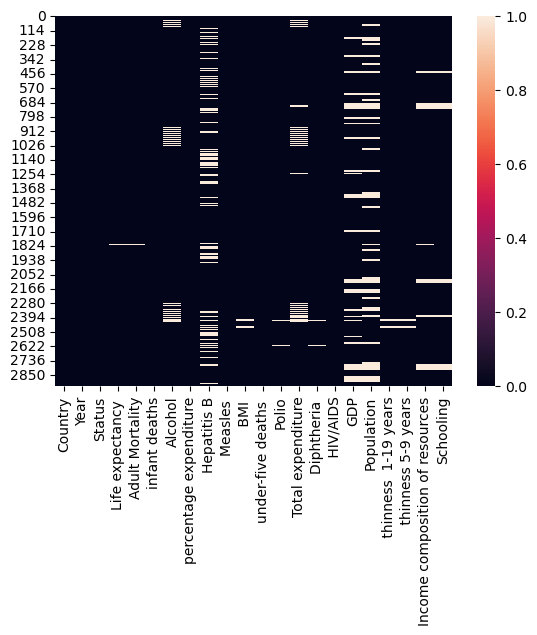

In [8]:
sns.heatmap(pd.isnull(data));


In [11]:
# Display of number of missing values in each feature
print(f'NULL values in the dataset:\n\n{data.isnull().sum()}')

NULL values in the dataset:

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


'Life expectancy' and 'Adult Mortality' had very few NaN values so we can fill those in

In [14]:
data['Life expectancy ']=data['Life expectancy '].fillna(value=data['Life expectancy '].mean())
data['Adult Mortality']=data['Adult Mortality'].fillna(value=data['Adult Mortality'].mean())

<Axes: >

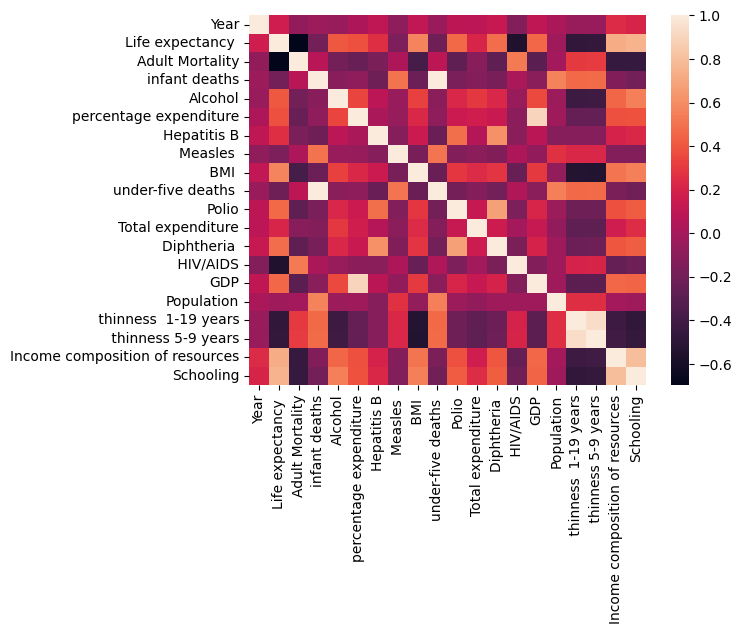

In [17]:
numeric_data = data.select_dtypes(include=np.number)
corr_data = numeric_data.corr()
sns.heatmap(corr_data)